In [53]:
import sqlite3
db=sqlite3.connect('School.sqlite')
db

In [54]:
cur=db.cursor()

In [15]:
sql_query ='create table Student (roll int primary key,name text,age int)'
cur.execute(sql_query)

OperationalError: table Student already exists

In [16]:
cur.execute('insert into Student values(102,"Amit",19)')

IntegrityError: UNIQUE constraint failed: Student.roll

In [56]:
db.commit()

In [25]:
db=sqlite3.connect('Employee.sqlite')
db

In [26]:
cur =db.cursor()


In [28]:
cur.execute('insert into EmployeeDetail values(105,"Amit",24,"Human Resource",76000)')

In [29]:
db.commit()

In [30]:
cur.execute('delete from EmployeeDetail where employeeid = 101')

In [31]:
db.commit()

In [34]:
cur.execute('delete from Employeedetail where employeeid =105')
db.commit()

In [35]:
id_1=102
cur.execute('delete from employeedetail where employeeid =?',(id_1, ))

In [36]:
db.commit()

In [58]:
cur.execute('select * from Student')
for row in cur:
    print(row)

(101, 'Aman', 18)
(102, 'Amit', 19)


### sqlite3 using pandas

In [96]:
import sqlite3
import pandas as pd
db=sqlite3.connect('School.sqlite')
data=pd.read_sql_query('select * from student',db)
data

,roll,name,age
0,101,Aman,18
1,102,Amit,19


In [98]:
data[data['age']==18]

,roll,name,age
0,101,Aman,18


### inserting new table in data frame

In [101]:
data=pd.DataFrame([[101,"aman","science",22000],[102,"anmol","maths",20000],[103,"amit","english",18000]],
                 columns=['ID','Name','Subject','Salary'])

In [102]:
data

,ID,Name,Subject,Salary
0,101,aman,science,22000
1,102,anmol,maths,20000
2,103,amit,english,18000


In [104]:
db=sqlite3.connect('faculty.sqlite')

In [105]:
data.to_sql("faculty",db)

In [106]:
data

,ID,Name,Subject,Salary
0,101,aman,science,22000
1,102,anmol,maths,20000
2,103,amit,english,18000


In [107]:
db=sqlite3.connect('School.sqlite')

### updating new column through dataframe

In [112]:
data=pd.read_sql_query('select * from student',db)
data["address"]="Test"
data.to_sql("Student",db,if_exists="replace")

,roll,name,age,Address
0,101,Aman,18,test
1,102,Amit,19,test


### Questions  1
A given data of 12 Employees working in an investment firm. So add the Employee Data in Employee SQLite Database of Employee_Detail Table which was created by you.

In [ ]:
db=sqlite3.connect('Employee.sqlite')
cur=db.cursor()

In [49]:
employee_id=[107,108,109,110,111,112,113]
name=['Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[85000,90000,60000,50000,75000,50000]

In [50]:
for i in range(6):
    cur.execute('insert into employeedetail values(?,?,?,?,?)',(employee_id[i],name[i],age[i],department[i],salary[i]))

In [51]:
db.commit()

In [52]:
cur.execute('delete from employeedetail where employeeid =100')
db.commit()

### Question 2
Find the employee_id of employee whose is working in Finance Department in Investment firm from Employee SQLite Database.
Print the employee_id as integer value

In [67]:
db=sqlite3.connect('Employee.sqlite')
cur=db.cursor()

In [78]:
cur.execute('select employeeid from employeedetail where department ="Finance"')

In [79]:
for i in cur:
    print(i)

(103,)
(107,)


### Question 3
Find the number of employee working in different department in an investment firm from Employee SQLite Database.
Print the department and number of employee

In [80]:
db=sqlite3.connect('Employee.sqlite')
cur=db.cursor()

In [95]:
cur.execute('select department,count(*) from employeedetail group by department')
ans=cur.fetchall()
for row in ans:
    print(row[0],row[1])

Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


### Question 4
Count Genre

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the count of each genre present in IMDB movie dataset?
Print the Genre and number of movies present in that genre.
Note: Ignore the empty value present in genre.

In [181]:
import pandas as pd
import sqlite3
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select * from genre',db)
dic=dict()
for row in data['genre']:
    dic[row]=dic.get(row,0)+1
for i in dic:
    if i!='':
        print(i,dic[i])

Biography 21
Adventure 43
Comedy 31
Drama 77
Action 33
Animation 13
Crime 11
Mystery 7
Romance 13
Thriller 14
History 6
Sport 3
Western 2
Sci-Fi 18
Family 3
Musical 1
Fantasy 7
War 2
Horror 2
Music 3


#### question 5
IMDB Movie

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.

In [191]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select i.movie_id,rating ,domestic,worldwide from imdb i join earning e on i.movie_id =e.movie_id',db)
data['Total']=data['Domestic']+data['Worldwide']
total=data['Rating'][data['Total'].argmax()]
total

8.1

## Assignments

IMDB Voted


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie.

In [201]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select max(TotalVotes),Title,rating from IMDB',db)
print(data['Title'][0],data['Rating'][0])

Inception (2010) 8.8


In [200]:
print(data['Title'][0],data['Rating'][0])

Inception (2010) 8.8


### IMDB running time
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.

In [277]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select Title,Runtime from IMDB',db)
data['Runtime'].dropna(inplace =True)
data['Runtime'][data['Runtime']=='']='0 min'
def split(a):
    a=a.split(' ')
    a=a[0]
    return a
data['Runtime']=data['Runtime'].apply(split)
data['Runtime']=data['Runtime'].astype(float)

data.sort_values(by ='Runtime',inplace =True,ascending =False)
data.reset_index(drop=True,inplace =True)
print(data['Title'][0],int(data['Runtime'][0]))

The Wolf of Wall Street (2013) 180


### IMDB profit
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [325]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select i.movie_id,title,domestic,worldwide,budget from IMDB i join earning e on i.movie_id=e.movie_id',db)
data['profit']=data['Domestic']+data['Worldwide']
data=data[data['Budget']!='']
#data['Budget']=data['Budget'].astype(float)
data['Net_Profit']=data['profit']-data['Budget']
data.sort_values(by='Net_Profit',inplace=True,ascending=False)
data.reset_index(inplace=True)
print(data['Title'][0])


Star Wars: The Force Awakens (2015)


### IMDB least budget

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [332]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select i.movie_id,title,domestic,worldwide,budget from IMDB i join earning e on i.movie_id=e.movie_id',db)
data['profit']=data['Domestic']+data['Worldwide']
data=data[data['Budget']!='']
data['Net_Profit']=data['profit']-data['Budget']
data.sort_values(by='Budget',inplace=True,ascending =True)
data.reset_index(inplace=True)
print(data['Title'][1])


,index,Movie_id,Title,Domestic,Worldwide,Budget,profit,Net_Profit
0,109,20709,Tyrannosaur (2011),22321,2.232100e+04,1e+06,4.464200e+04,-955358
1,71,30154,Short Term 12 (2013),1013100,1.013100e+06,1e+06,2.026200e+06,1.0262e+06
2,111,35939,What We Do in the Shadows (2014),3469224,6.263224e+06,1.6e+06,9.732448e+06,8.13245e+06
3,43,23963,Hunt for the Wilderpeople (2016),5205468,5.205468e+06,2.5e+06,1.041094e+07,7.91094e+06
4,7,25398,Before Midnight (2013),8114627,1.117647e+07,3e+06,1.929110e+07,1.62911e+07
...,...,...,...,...,...,...,...,...
109,79,38626,Star Wars: The Force Awakens (2015),936662225,2.068224e+09,2.45e+08,3.004886e+09,2.75989e+09
110,13,49590,Captain America: Civil War (2016),408084349,1.153304e+09,2.5e+08,1.561389e+09,1.31139e+09
111,36,21411,Harry Potter and the Deathly Hallows: Part 1 (...,295983305,9.602833e+08,2.5e+08,1.256267e+09,1.00627e+09
112,86,29419,The Dark Knight Rises (2012),448139099,1.084939e+09,2.5e+08,1.533078e+09,1.28308e+09


### IMDB Year Top

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.


Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.


Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.

In [335]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select title,domestic,worldwide from IMDB i join earning e on i.movie_id=e.movie_id',db)
data['profit']=data['Domestic']+data['Worldwide']

In [387]:
def replace(a):
    a=a.replace(")"," ")
    a=a[-5:]
    return a
data['Year']=data['Title'].apply(replace)
data.sort_values(by="Year",inplace=True,ascending=True)
df=data.groupby('Year')
x=pd.DataFrame(df['profit'].max())
y=x.merge(data ,on ='profit')
for i in range(x.shape[0]):
    print(y.Year[i],y.Title[i])


2010  Toy Story 3 (2010)
2011  Rise of the Planet of the Apes (2011)
2012  The Avengers (2012)
2013  The Hunger Games: Catching Fire (2013)
2014  Guardians of the Galaxy (2014)
2015  Star Wars: The Force Awakens (2015)
2016  Rogue One (2016)


### IMDB genre budget

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

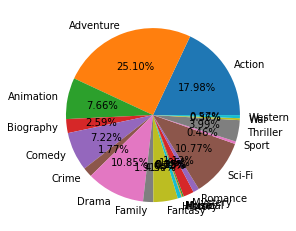

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


In [21]:
import sqlite3
import pandas as pd
import numpy as np
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select imdb.movie_id,title,budget,genre from imdb join genre on imdb.movie_id=genre.movie_id' ,db)
data[data['Budget']=='']='0'
data['Budget']=pd.to_numeric(data['Budget'])
invest=data.groupby('genre')['Budget'].sum()
genre =invest[2:].index
budget=invest[2:].values
plt.pie(budget,labels=genre,autopct='%0.2f%%')
plt.show()
x=np.true_divide(budget,budget.sum())*100
for i in range(len(genre)):
    print(genre[i],format(x[i],'.2f'))


In [25]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select imdb.movie_id,title,budget,genre from imdb join genre on imdb.movie_id=genre.movie_id' ,db)
data[data['Budget']=='']='0'
data['Budget']=pd.to_numeric(data['Budget'])
Investment =data.groupby('genre')['Budget'].sum()
Genre =Investment[2:].index
Budget =Investment[2:].values

for i in range(len(Genre)):
    print(Genre[i],format((Budget[i]/Budget.sum())*100,'.2f'))


Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


### IMDB genre earning

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


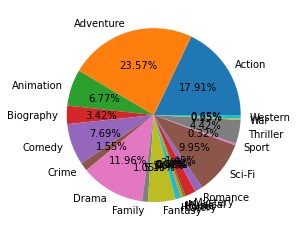

In [66]:
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
db =sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select genre.movie_id,genre,worldwide,domestic from genre join earning on genre.movie_id=earning.movie_id',db)
df=data.copy()
#df[df['Worldwide']==""]='0'
#df[df['Domestic']==""]='0'
df['Total']=df['Worldwide']+df['Domestic']
df['Total']=pd.to_numeric(df['Total'])
#df.sort_values(by='genre',inplace=True)
earning=df.groupby('genre')['Total'].sum()
movie =earning[1:].index
amount=earning[1:].values
perTotal=np.true_divide(amount,amount.sum())*100
for i in range(len(movie)):
    print(movie[i],format(perTotal[i],'.2f'))

plt.pie(amount,labels=movie,autopct='%0.2f%%')
plt.show()


### IMDB genre budget

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.


In [67]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select title,rating ,genre from imdb join genre on genre.movie_id =imdb.movie_id where genre in ("Sci-Fi","Mystery")and rating >=8',db)
df=data.copy()
print(df['Title'][0])

Arrival (2016)
